In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding, SimpleRNN
from tensorflow.keras.models import Model

In [3]:
data=pd.read_csv("D:/Downloads/spam.csv", encoding='latin-1')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data=data.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.columns=['labels','data']
data.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data['b_labels']=data['labels'].map({'ham':0, 'spam':1})
data.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
Y=data['b_labels'].values

In [9]:
df_train, df_test, Ytrain, Ytest=train_test_split(data['data'],Y, test_size=0.33)
print(df_train.shape, Ytrain.shape, df_test.shape)

(3733,) (3733,) (1839,)


In [10]:
MAX_VOCAB_SIZE=20000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train=tokenizer.texts_to_sequences(df_train)
sequences_test=tokenizer.texts_to_sequences(df_test)

In [11]:
word2idx=tokenizer.word_index
V=len(word2idx)
print("Found %s unique tokens"%V)

Found 7189 unique tokens


In [12]:
data_train=pad_sequences(sequences_train)
data_train.shape   #N*T

(3733, 189)

In [13]:
T=data_train.shape[1]

In [14]:
data_test=pad_sequences(sequences_test,maxlen=T)
data_test.shape

(1839, 189)

In [17]:
D=20
M=5

i=Input(shape=(T,))
x=Embedding(V+1, D)(i)
x=SimpleRNN(M, return_sequences=True)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(1, activation='sigmoid')(x)
model=Model(i,x)

In [18]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
r=model.fit(data_train, Ytrain, epochs=10, validation_data=(data_test, Ytest))

Train on 3733 samples, validate on 1839 samples
Epoch 1/10
3733/3733 [==============================] - 18s 5ms/sample - loss: 0.4801 - accuracy: 0.8663 - val_loss: 0.3955 - val_accuracy: 0.8630
Epoch 2/10
3733/3733 [==============================] - 15s 4ms/sample - loss: 0.3042 - accuracy: 0.8677 - val_loss: 0.2488 - val_accuracy: 0.8646
Epoch 3/10
3733/3733 [==============================] - 15s 4ms/sample - loss: 0.2061 - accuracy: 0.9022 - val_loss: 0.2002 - val_accuracy: 0.9358
Epoch 4/10
3733/3733 [==============================] - 15s 4ms/sample - loss: 0.1603 - accuracy: 0.9807 - val_loss: 0.1677 - val_accuracy: 0.9706
Epoch 5/10
3733/3733 [==============================] - 16s 4ms/sample - loss: 0.1277 - accuracy: 0.9917 - val_loss: 0.1427 - val_accuracy: 0.9799
Epoch 6/10
3733/3733 [==============================] - 15s 4ms/sample - loss: 0.1027 - accuracy: 0.9962 - val_loss: 0.1238 - val_accuracy: 0.9821
Epoch 7/10
3733/3733 [==============================] - 15s 4ms/sample

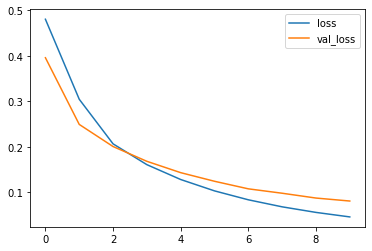

In [20]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

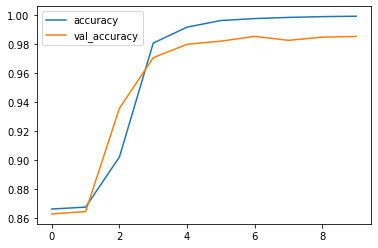

In [21]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()